# Stacking Multiple 2D Plots on a 3D Plot 

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import h5py as hpy
%matplotlib widget
import lib

In [45]:
cenM_artime = np.array(hpy.File('/data1/linefits/outputsLFCHPF/OriginalReferenceFileRuns/consolidatedData_master/All_time.hdf5', 'r')['dat'][:])
cenM_arwavl = np.array(hpy.File('/data1/linefits/outputsLFCHPF/OriginalReferenceFileRuns/consolidatedData_master/All_centroidWl.hdf5', 'r')['dat'][:])
cenM_indices = np.array(hpy.File('/data1/linefits/outputsLFCHPF/OriginalReferenceFileRuns/consolidatedData_master/All_index.hdf5')['dat'][:])

In [28]:
velocities = lib.wl2vel(cenM_arwavl, 50)
time = lib.convert_time(cenM_artime)

In [40]:
vels1 = lib.abs_ind_vels(cenM_arwavl, 200, 0)
vels2 = lib.abs_ind_vels(cenM_arwavl, 201, 0)
vels3 = lib.abs_ind_vels(cenM_arwavl, 202, 0)

In [56]:
seconds = lib.datetime_conversionify(time, 0)

In [27]:
medians = [] 
for i in range(len(velocities)):
    med = np.nanmedian(velocities[i])
    medians.append(med)

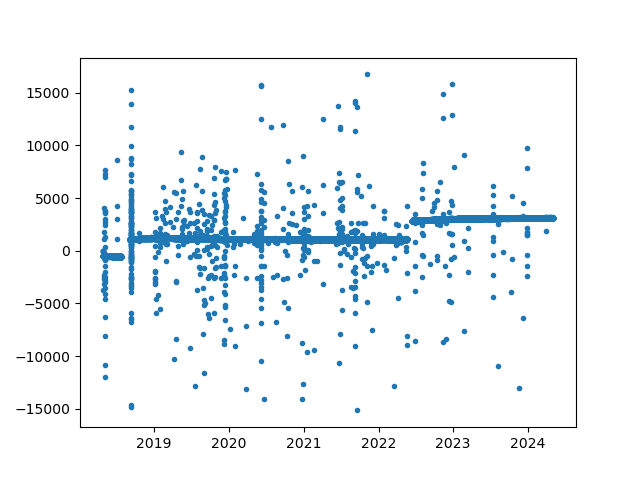

In [37]:
plt.figure()
plt.plot(time, vels1,'.')

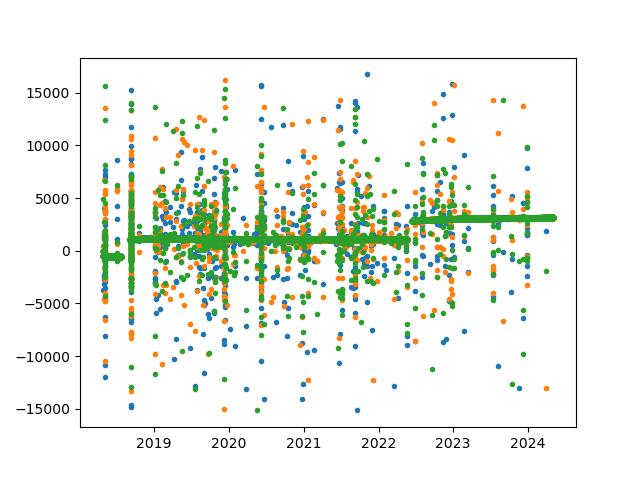

In [41]:
plt.figure()
plt.plot(time, vels1, '.')
plt.plot(time, vels2, '.')
plt.plot(time, vels3, '.')

In [62]:
median1 = lib.boxcar_median(vels1,200)
median2 = lib.boxcar_median(vels2, 200)
median3 = lib.boxcar_median(vels3, 200)

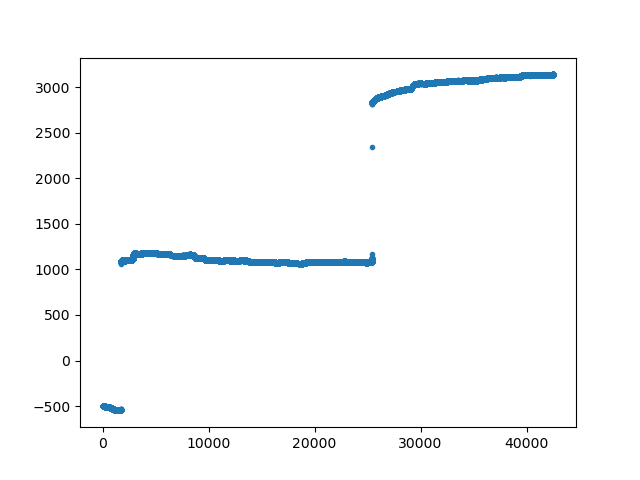

In [64]:
plt.figure()
plt.plot(median1, '.')

In [ ]:
median = lib.boxcar_median(velocities, 200)

In [77]:
abs_indices = [] 

for i in range(0, 42539): 
    abs_indices.append(i)

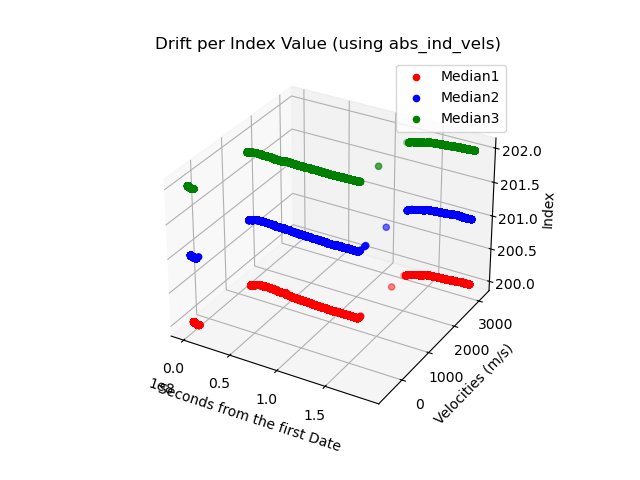

In [90]:
%matplotlib widget 
x1 = seconds
y1 = median1
z1 = 200

x2 = seconds 
y2 = median2
z2 = 201

x3 = seconds
y3 = median3
z3 = 202

# Create a new figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the first dataset
ax.scatter(x1, y1, z1, c='r', label='Median1')

ax.scatter(x2, y2, z2, c='b', label='Median2')

ax.scatter(x3, y3, z3, c='g', label='Median3')

# Add labels
ax.set_xlabel('Seconds from the first Date')
ax.set_ylabel('Velocities (m/s)')
ax.set_zlabel('Index')

# Add a legend
ax.legend()

plt.title('Drift per Index Value (using abs_ind_vels)')
# Show the plot
plt.show()